In [189]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Import Awards Data csv

In [236]:
awards_df = pd.read_csv('awards_df.csv')
awards_df.set_index('Titles', inplace=True)
awards_df.head()

,Network,Award Year,Nominations,Actor Nominations,Total Nominations
Titles,,,,,
A Black Lady Sketch Show,NaN,2020,0,1,1
Atlanta,FX Networks,2018,5,4,9
Atlanta,FX Networks,2017,4,2,6
Barry,HBO,2019,4,5,9
Barry,HBO,2018,4,2,6


In [237]:
#sns.catplot(data=awards_df, x='Network', kind='count', hue='Network',dodge=False, aspect=2);

In [238]:
#show nominations by network/ year
#sns.catplot(data=awards_df, x='Network', y='Nominations', 
            #hue='Award Year',dodge=False, aspect=2, kind='bar', 
            #palette='CMRmap');

In [239]:
awards_grouped = awards_df.reset_index().groupby(['Network']).sum()
awards_grouped.sort_values('Total Nominations', inplace=True, ascending=False)
awards_grouped

,Award Year,Nominations,Actor Nominations,Total Nominations
Network,,,,
HBO,34315,32,56,88
Netflix,46428,21,38,59
Prime Video,8076,12,23,35
NBC,18169,8,21,29
FX Networks,16149,15,12,27
ABC,12111,4,14,18
Hulu,12114,7,11,18
Pop TV,4039,5,6,11
BBC America,6057,2,7,9


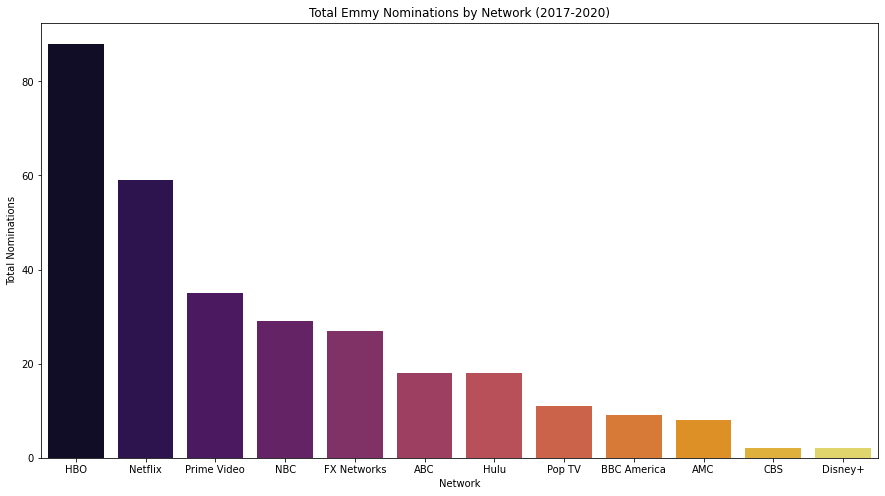

In [240]:
#show nominations by network for the last 4 years
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(data=awards_grouped.reset_index(),x='Network', y='Total Nominations',
           dodge=False, palette='inferno');
plt.title('Total Emmy Nominations by Network (2017-2020)')
plt.savefig('images/TotalNominationsAllNetworks.png')

In [197]:
#total nominations by network/ year
#sns.catplot(data=awards_df, x='Network', y='Total Nominations',
            #hue='Award Year',dodge=False, aspect=2, kind='bar',
            #palette='CMRmap');

In [198]:
top_networks = ['HBO','Prime Video', 'Netflix']
top_networks_boolean = awards_df.Network.isin(top_networks)
top_networks_df = awards_df[top_networks_boolean]

top_networks_df.head(3)

,Network,Award Year,Nominations,Actor Nominations,Total Nominations
Titles,,,,,
Barry,HBO,2019,4,5,9
Barry,HBO,2018,4,2,6
Bodyguard,Netflix,2019,1,0,1


In [199]:
top_networks_grouped = top_networks_df.reset_index().groupby(['Network']).sum()
#top_networks_grouped.drop(columns='Total Nominations', inplace=True)opgf0v

In [200]:
#sns.scatterplot(data=top_networks_df.reset_index(), 
 #               x='Nominations', y='Actor Nominations', hue='Network')

In [201]:
#sns.heatmap(top_networks_grouped)

In [202]:
#sns.jointplot(data=top_networks_df.reset_index(),x='Nominations', y='Actor Nominations', 
 #          hue='Network',kind='kde');

In [203]:
#sns.displot(data=top_networks_df,x='Nominations', y='Actor Nominations', 
 #          hue='Network', palette='inferno')

In [204]:
top_networks_df.head()

,Network,Award Year,Nominations,Actor Nominations,Total Nominations
Titles,,,,,
Barry,HBO,2019,4,5,9
Barry,HBO,2018,4,2,6
Bodyguard,Netflix,2019,1,0,1
Curb Your Enthusiasm,HBO,2020,1,0,1
Curb Your Enthusiasm,HBO,2018,1,3,4


In [205]:
hbo_df = top_networks_df.loc[top_networks_df['Network'] == 'HBO']
netflix_df = top_networks_df.loc[top_networks_df['Network'] == 'Netflix']
prime_df = top_networks_df.loc[top_networks_df['Network'] == 'Prime Video']

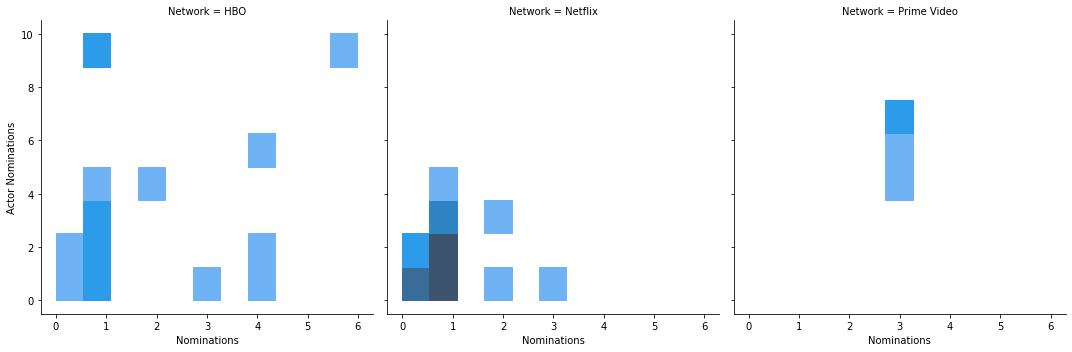

In [206]:
sns.displot(data=top_networks_df,x='Nominations', y='Actor Nominations', 
            col='Network', palette='inferno');
plt.savefig('NominationsByNetwork')

In [207]:
#f, axes = plt.subplots(1,3)

#sns.displot(data=hbo_df,x='Nominations', y='Actor Nominations');

In [208]:
#sns.displot(data=netflix_df,x='Nominations', y='Actor Nominations');

In [209]:
#sns.displot(data=prime_df,x='Nominations', y='Actor Nominations');

In [210]:
# top 3 nominated networks, total nominations over years
#plt.figure(figsize=(10,6))

#sns.lineplot(data=top_networks_grouped.reset_index(), x='Award Year', y='Total Nominations',
 #           hue='Network', 
  #          palette='CMRmap');

In [211]:
#sns.catplot(data=top_networks_df.reset_index(), x='Network', 
            #kind='count', palette='CMRmap', height=7, hue='index', ci=False,
            #dodge=False, legend=True);

In [212]:
#top_networks_df.reset_index().groupby(['Network','index']).sum().unstack().plot(kind='bar', 
                                                                                #stacked=True, legend=False)

In [220]:
years = ['2019','2020']
years_boolean = top_networks_df["Award Year"].isin(years)
top_networks_grouped2 = top_networks_df[years_boolean]
top_networks_grouped1.head(3)

Total Nominations                                            \
index                   Barry Bodyguard Curb Your Enthusiasm Dead To Me   
Network                                                                   
HBO                       9.0       NaN                  1.0        NaN   
Netflix                   NaN       1.0                  NaN        4.0   
Prime Video               NaN       NaN                  NaN        NaN   

                                                                        \
index       Fleabag GLOW Game Of Thrones House of Cards Insecure Ozark   
Network                                                                  
HBO             NaN  NaN            10.0            NaN      3.0   NaN   
Netflix         NaN  2.0             NaN            2.0      NaN   8.0   
Prime Video     8.0  NaN             NaN            NaN      NaN   NaN   

                                                               \
index       Russian Doll Stranger Things Succession The Crown   
Network                                                         
HBO                  NaN             NaN       11.0       NaN   
Netflix              4.0             1.0        NaN       3.0   
Prime Video          NaN             NaN        NaN       NaN   

                                                                          
index       The Kominsky Method The Marvelous Mrs. Maisel Veep Westworld  
Network                                                                   
HBO                         NaN                       NaN  6.0       2.0  
Netflix                     5.0                       NaN  NaN       NaN  
Prime Video                 NaN                      20.0  NaN       NaN

In [221]:
sns.color_palette('inferno',as_cmap=True)

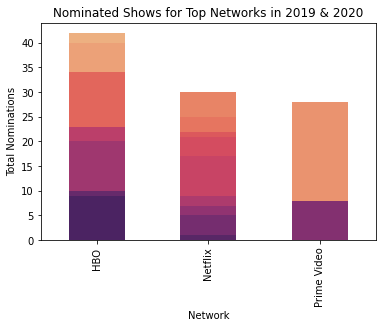

In [222]:
#number of shows per top network, for award years 19 and 20 only
top_networks_grouped1.plot(kind='bar', stacked=True, legend=False,colormap='flare_r');
plt.title('Nominated Shows for Top Networks in 2019 & 2020');
plt.ylabel('Total Nominations');
plt.savefig('TopNetworkShows')

In [158]:
#sns.displot(data=top_networks_df.reset_index(), x='Network',y='Total Nominations')

In [159]:
#sns.displot(data=top_networks_df.reset_index(), y="Total Nominations", hue='index', multiple="stack", palette='inferno');